# BL40A2030 Wireless Communication Networks

## Week 4 - Assignment

### Author: Jesse Peltola

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import style
style.use('bmh')
from scipy.spatial import distance
#Not to show warning messages (to keep the notebook clean)
import warnings
warnings.filterwarnings('ignore')



**1. (Propagation effects in wireless transmission) When modeling wireless links, we can cite three main effects: distance-dependent path-loss, slow fading and fast fading.**

(a) Explain with your own words these three effects.






##### **Answer:**

a) Distance-dependent path loss dictates how the strength of the signal diminishes with increasing distance.

Slow fading is the presence of large objects such as buildings that produce a shadow in the signal. This affect the received power level depending on slow fading. 

Fast fading happens when multiple replicas of a transmitted signal reach the receiver simultaneuosly. 



(b) A distance dependent path-loss states a relation between the power of the signal as a function of the distance that the signal have travelled. Plot $P = d^{-\alpha}$ where $\alpha$ is the path-loss exponent. Consider: $1\leq d \leq 5$ for four values of path loss exponends: $\alpha=2, 3, 4, 5$.

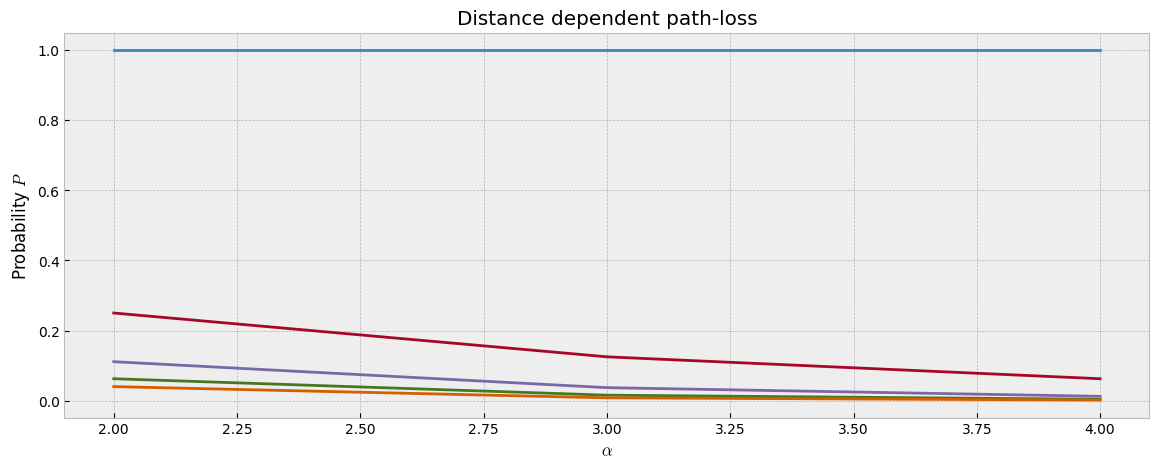

In [6]:
#b

alpha = range(2,5)

series = []
plt.figure(figsize=(14, 5))
for d in range(1,6):
    P = [d ** (-a) for a in alpha]
    temp_plt = plt.plot(alpha, P, label="$d$")

plt.title("Distance dependent path-loss")
plt.xlabel("$\\alpha$")
plt.ylabel("Probability ${P}$")
plt.show()




(c) What is the impact of $\alpha$ in relation to the interference level experienced by a given receiver at a given distance $d$ from the interferer transmitter?

*Note: In the text, the path-loss exponent is also denoted by $\eta$. In this case, $\alpha$ and $\eta$ refer to the same thing (other authors use even other notations). I prefer to use $\alpha$.*

**2. (Interference models) Explain with your own words the following models and their differences** 

- Collision channel model

In the collision channel model, all messages are assumed to be lost when two messages are transmitted simultaneously on the channel. 

- Capture channel model

In the capture channel model, if one of the signals is stronger than other and they are transmitted simultaneously, it will be likely to be received. This is more realistic model than the collision channel model. 

- Vulnerability circle capture model

The vulnerability circle capture model is only applied to the pairwise interference only. In this model, the only transimmiters that are within a given vulnerability circle with radius will interfere with each other. 

- Power capture model

The model offers a more realistic condition for successful reception. In this model, a message is successfully decoded if its receive power exceeds, by a given threshold $\beta_p$ the power of the aggregate signal composed of all other messages.


**3. (Physical interference model) Explain with your own words equation (3) from [4]:**

$$ \dfrac{P_i |X_i - X_{R(i)}|^{-\alpha}}{\sigma^2 + \sum_{k \in \mathcal{N}, k\ \neq i} P_k |X_k - X_{R(i)}|^{-\alpha} } \geq \beta_p$$

- Meaning of the variables there.

    * $P_i$ - the transmit power of the transmitter i 
    * $\sigma^2$ - Noise power
    * $|X_i - X_{R(i)}|$ - the distance between transmitter $X_i$ and receiver associated i $X_{R(i)}$ 
    * $\alpha$ - path loss exponent
    * $ \beta_p$ - receiver power threshold
    * $\sum_{k \in \mathcal{N}, k\ \neq i} P_k |X_k - X_{R(i)}|^{-\alpha}$ - The sum of the interference from all other nodes
      considering their transmit power and distance

- Identify the sources of uncertainty on these variables.

    There are a variety of sources for potential uncertainty in these variables. For example if the receivers or senders
    are moving then the euclidean distance will be changing or uncertain. It is also possible that the transmitters will change
    their transmit power which will alter the value of P.

- Rewrite here a simplified version of this equation when: Noise and fading are neglected, the transmit power from all transmitters are the same, and the receiver is located at the origin i.e. (0, 0). Which are the possible source of uncertainty in this case?

    The equation above is from the paper and modified from SIR equation which is the simplified version of this equation. 

    $$ \dfrac{P_{r,i}}{ \sum_{j\ \neq i} P_{r,j}  } > \beta_p$$






**4. (Topologies) Draw in the same plot: (a) random network with 200 nodes in a square $10 \times 10$ uniformly distributed in $x$ and $y$ and (b) square grid with $16$ elements. Do you think this is a good model for a [small-cell](https://en.wikipedia.org/wiki/Small_cell) in a cellular network?**

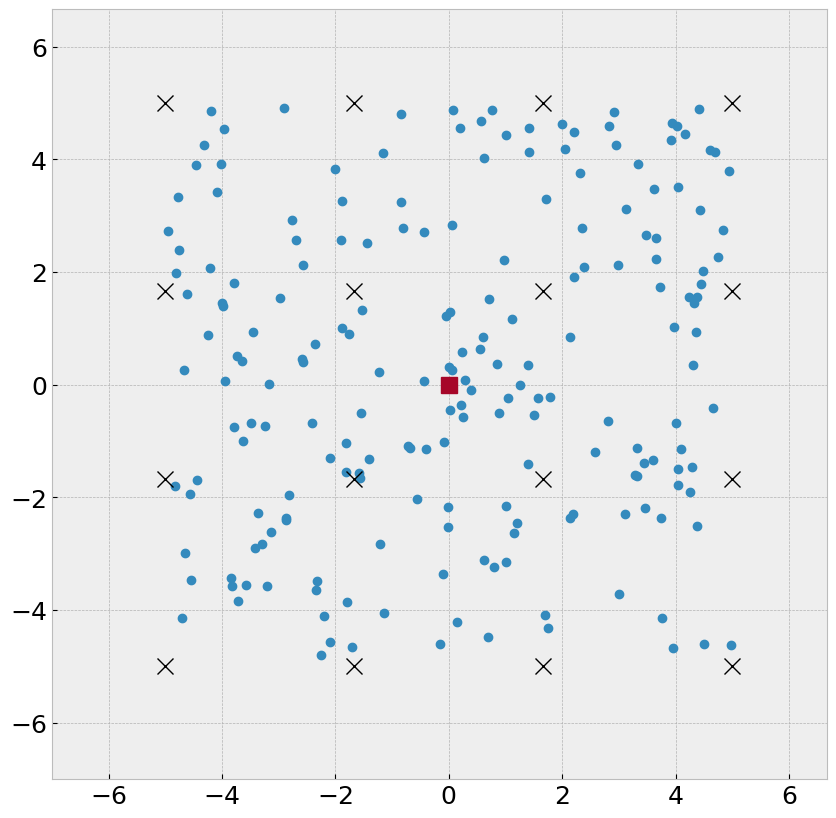

In [7]:
#Network size (square)
L = 10
#This is the sqrt of the number
n = 4
#
#Regular distribution in x
position_x_realization_aux1 = np.linspace(-L/2, L/2 , n) 
#Regular distribution in x
position_y_realization_aux1 = np.linspace(-L/2, L/2 , n) 
#
position_x_realization1, position_y_realization1 = np.meshgrid(position_x_realization_aux1, position_y_realization_aux1)
#####
#Regular distribution in x
position_x_realization_aux2 = np.linspace(-L/2 + (position_x_realization_aux1[1] - position_x_realization_aux1[0])/2, L/2 + (position_x_realization_aux1[1] - position_x_realization_aux1[0])/2 , n) 
#Regular distribution in x
position_y_realization_aux2 = np.linspace(-L/2 + (position_y_realization_aux1[1] - position_y_realization_aux1[0])/2, L/2 + (position_y_realization_aux1[1] - position_y_realization_aux1[0])/2 , n) 
#
position_x_realization2, position_y_realization2 = np.meshgrid(position_x_realization_aux2, position_y_realization_aux2)


## Random topology


#Network size (square)
L = 10
#Number of nodes
n = 200
#
#Uniform distribution in x
position_x_realization = np.random.uniform(-L/2,L/2,n)

#Uniform distribution in y
position_y_realization = np.random.uniform(-L/2,L/2,n)

# Figure
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(10, 10))
plt.plot(position_x_realization, position_y_realization, 'o')
plt.plot(0, 0, 's',markersize=12)
plt.plot(position_x_realization1, position_y_realization1, 'k x',markersize=12)
plt.xlim(-L/2-2,L/2 + (position_x_realization_aux1[1] - position_x_realization_aux1[0])/2 )
plt.ylim(-L/2-2,L/2 + (position_y_realization_aux1[1] - position_y_realization_aux1[0])/2 )
plt.show()


As we can see from the figure, the nodes are randomly distributed and it is good enough for a small-cell in a cellular network. Due to randomness it is impossible to know whether there is a location of higher density. 

However, the network designer can optimize this much better for the small-cell model in the cellular network and reduce the randomness. 